In [1]:
!pip install object-detection-fastai

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from fastai import *
from fastai.vision import *
from fastai.callbacks import *

In [5]:
pip install distro

In [6]:
from object_detection_fastai.helper.object_detection_helper import *
from object_detection_fastai.loss.RetinaNetFocalLoss import RetinaNetFocalLoss
from object_detection_fastai.models.RetinaNet import RetinaNet
from object_detection_fastai.callbacks.callbacks import BBLossMetrics, BBMetrics, PascalVOCMetric

In [7]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
import os
os.chdir('gdrive/MyDrive')
!ls

Mounted at /content/gdrive
'Colab Notebooks'   teamB_dataset


In [67]:
#3 -> 4 -> 5 -> 6 -> 7 -> 1 -> 2
#5 -> 
coco = Path('teamB_dataset/data2')
# images, lbl_bbox = get_annotations(coco/'train.json')
train_images, train_lbl_bbox = get_annotations(coco/'train.json')
val_images, val_lbl_bbox = get_annotations(coco/'valid.json')
images, lbl_bbox = train_images+val_images,train_lbl_bbox+val_lbl_bbox
img2bbox = dict(zip(images, lbl_bbox))

# get_y_func = lambda o:img2bbox[o.name]

path1 = Path('teamB_dataset/data2/train')
path2 = Path('teamB_dataset/data2/valid')

def get_y_func(o):
    filename = o.name
    if img2bbox.get(o.name):
        return img2bbox[o.name]
    else:
      #그 라벨링 안된 사진파일들 전부 삭제해버리기~
        print(o.name)
        if os.path.isfile(path1/o.name):
          os.remove(path1/o.name)
        elif os.path.isfile(path2/o.name):
          os.remove(path2/o.name)
        return

In [68]:
# train_images, train_lbl_bbox = get_annotations(path/'train.json')
# val_images, val_lbl_bbox = get_annotations(path/'valid.json')

# images, lbl_bbox = train_images+val_images,train_lbl_bbox+val_lbl_bbox
# img2bbox = dict(zip(images, lbl_bbox))
# get_y_func = lambda o:img2bbox[o.name]

# split_by_files(val_images)

In [69]:
size = 256

In [70]:
data = (ObjectItemList.from_folder(coco)
        #Where are the images? -> in coco
        .split_by_rand_pct()
        #.split_by_files(val_images)
        #How to split in train/valid? -> randomly with the default 20% in valid
        .label_from_func(get_y_func)
        #How to find the labels? -> use get_y_func
        .transform(get_transforms(), tfm_y=True, size=size)
        #Data augmentation? -> Standard transforms with tfm_y=True
        .databunch(bs=64, collate_fn=bb_pad_collate))
        #Finally we convert to a DataBunch and we use bb_pad_collate
#data = data.normalize()

In [71]:
data.show_batch(rows=5, ds_type=DatasetType.Valid, figsize=(20,20))

TypeError: ignored

In [72]:
data.classes

['background',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 'eye',
 'eye_close',
 'eye_half_close',
 'eye_open']

In [14]:
anchors = create_anchors(sizes=[(32,32),(16,16),(8,8),(4,4)], ratios=[0.5, 1, 2], scales=[0.35, 0.5, 0.6, 1, 1.25, 1.6])

In [65]:
all_boxes, all_labels = show_anchors_on_images(data, anchors, figsize=(25,25))

Output hidden; open in https://colab.research.google.com to view.

In [16]:
# n_classes = data.train_ds.c

# crit = RetinaNetFocalLoss(anchors)

# encoder = create_body(models.resnet18, True, -2)
# model = RetinaNet(encoder, n_classes=data.train_ds.c, n_anchors=18, sizes=[32,16,8,4], chs=32, final_bias=-4., n_conv=2)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


In [17]:
# voc = PascalVOCMetric(anchors, size, [i for i in data.train_ds.y.classes[1:]])
# learn = Learner(data, model, loss_func=crit, callback_fns=[ShowGraph, BBMetrics],
#                 metrics=[voc])

In [45]:
learn.split([model.encoder[6], model.c5top5])
learn.freeze_to(-2)

In [66]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


KeyboardInterrupt: ignored

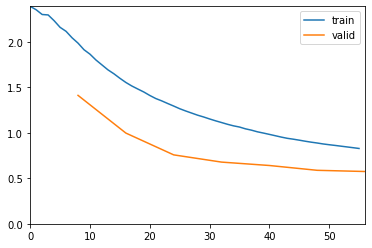

In [47]:
learn.fit_one_cycle(7,1.32E-04)

In [58]:
# learn.save('a') #for data6
# learn.save('b') #for data5
# learn.save('c') #for data6 more
learn.save('d')

# learn.save('c') #for data5
#learn.save('d') #for data6,7
# learn.load('c')
# learn.load('e')
# learn.save('e') #for data1
# # learn.save('f') #for data2

# learn.export(file = 'export_ml_sam2.pkl')

In [54]:
learn.data = data

IndexError: ignored

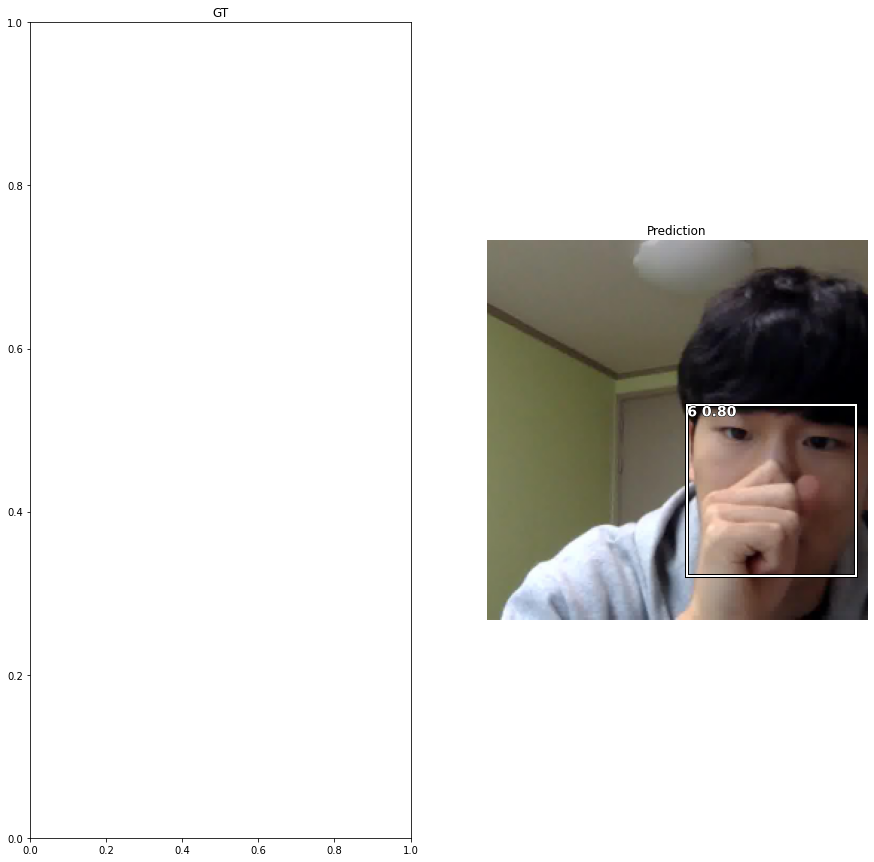

In [56]:
show_results_side_by_side(learn, anchors, detect_thresh=0.25, nms_thresh=0.1, image_count=15)